In [877]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

# Goal
The goal of this notebook is to explore the data provided by the US Census Bureau and translate the bulleted information in this article
to easy to understand charts. 

In [878]:
import pandas as pd
import numpy as np
import re

In [879]:
def conv_non_digits(str):
    result = int(re.sub("[^0-9]","0", str))
    return result

In [880]:
cs_df = pd.read_csv("2018_data.csv")
cs_df_keys = pd.read_csv("2018_keys.csv")



In [881]:
cs_df_keys

,GEO_ID,id
0,GEO_ID_F,Geo Footnote
1,NAME,Geographic Area Name
2,NAICS2017,2017 NAICS code
3,NAICS2017_LABEL,Meaning of NAICS code
4,SECTOR,NAICS economic sector
5,INDLEVEL,Industry level
6,NAICS2017_F,2017 NAICS Footnote
7,SUBSECTOR,SUBSECTOR
8,INDGROUP,Industry group
9,SEX,Sex code


In [882]:
cs_df = cs_df.drop(
    cs_df.columns.difference(
        ["SEX_LABEL", "ETH_GROUP_LABEL", 
        "RACE_GROUP_LABEL","FIRMPDEMP", 
        "VET_GROUP_LABEL","EMPSZFI", "EMPSZFI_LABEL", 
        "EMP", "EMPSZFI_LABEL","RCPPDEMP", "RCPSZFI_LABEL",
        ]), axis = 1)


cs_df = cs_df.drop(0, axis = 0)
cs_df["RCPPDEMP"] = cs_df["RCPPDEMP"].apply(conv_non_digits)
cs_df["FIRMPDEMP"] = cs_df["FIRMPDEMP"].apply(conv_non_digits)


In [883]:
cs_df.head()

,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP_LABEL,VET_GROUP_LABEL,RCPSZFI_LABEL,FIRMPDEMP,RCPPDEMP,EMP
1,Total,Total,Total,Total,"Firms with sales/receipts of less than $5,000",36605,83359,92450
2,Total,Total,Total,Total,"Firms with sales/receipts of less than $5,000",8595,19975,13411
3,Total,Total,Total,Total,"Firms with sales/receipts of less than $5,000",3683,7530,11021
4,Total,Total,Total,Total,"Firms with sales/receipts of less than $5,000",247,533,485
5,Total,Total,Total,Total,"Firms with sales/receipts of less than $5,000",303,517,2287


In [884]:
black_firms = cs_df[cs_df.RACE_GROUP_LABEL == "Black or African American"]
black_rev = black_firms["RCPPDEMP"].sum()
black_business = black_firms["FIRMPDEMP"].sum()

black_firms.iloc[0:45]

,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP_LABEL,VET_GROUP_LABEL,RCPSZFI_LABEL,FIRMPDEMP,RCPPDEMP,EMP
521,Total,Total,Black or African American,Total,"Firms with sales/receipts of less than $5,000",1476,3751,1710
522,Total,Total,Black or African American,Total,"Firms with sales/receipts of less than $5,000",440,1235,562
523,Total,Total,Black or African American,Total,"Firms with sales/receipts of less than $5,000",0,0,100 to 249 employees
524,Total,Total,Black or African American,Total,"Firms with sales/receipts of less than $5,000",488,1303,685
525,Total,Total,Black or African American,Total,"Firms with sales/receipts of $5,000 to $9,999",1677,11441,1267
526,Total,Total,Black or African American,Total,"Firms with sales/receipts of $5,000 to $9,999",510,3837,386
527,Total,Total,Black or African American,Total,"Firms with sales/receipts of $5,000 to $9,999",148,824,90
528,Total,Total,Black or African American,Total,"Firms with sales/receipts of $5,000 to $9,999",658,4662,476
529,Total,Total,Black or African American,Total,"Firms with sales/receipts of $5,000 to $9,999",0,0,0 to 19 employees
530,Total,Total,Black or African American,Total,"Firms with sales/receipts of $10,000 to $24,999",3621,61709,4111


In [885]:
pacific_firms = cs_df[cs_df.RACE_GROUP_LABEL == "Native Hawaiian and Other Pacific Islander"]
pacific_rev = pacific_firms["RCPPDEMP"].sum() 
pacific_business = pacific_firms["FIRMPDEMP"].sum()

print(pacific_rev)
print(pacific_business)

123195257
69832


In [886]:
native_firms = cs_df[cs_df.RACE_GROUP_LABEL == "American Indian and Alaska Native"]
native_rev = native_firms["RCPPDEMP"].sum()
native_business = native_firms["FIRMPDEMP"].sum()

print(native_rev)
print(native_business)

314640213
279607


In [887]:
asian_firms = cs_df[cs_df.RACE_GROUP_LABEL == "Asian"]
asian_rev = asian_firms["RCPPDEMP"].sum() 
asian_business = asian_firms["FIRMPDEMP"].sum()

print(asian_rev)
print(asian_business)

9281607393
6655604


In [888]:
minority_firms = cs_df[cs_df.RACE_GROUP_LABEL == "Minority"]
minority_rev = minority_firms["RCPPDEMP"].sum() 
minority_business = minority_firms["FIRMPDEMP"].sum()

print(minority_rev)
print(minority_business)

15887034059
12125448


In [889]:
non_minority_firms = cs_df[cs_df.RACE_GROUP_LABEL == "Nonminority"]
non_minority_rev = non_minority_firms["RCPPDEMP"].sum() 
non_minority_business = non_minority_firms["FIRMPDEMP"].sum()

print(non_minority_rev)
print(non_minority_business)

132264597781
54405244


In [890]:
hispanic_firms = cs_df[cs_df.ETH_GROUP_LABEL == "Hispanic"]
hispanic_rev = hispanic_firms["RCPPDEMP"].sum() 
hispanic_business = hispanic_firms["FIRMPDEMP"].sum()

print(hispanic_rev)
print(hispanic_business)

4970809407
3887830


In [891]:
veteran_firms = cs_df[cs_df.VET_GROUP_LABEL == "Veteran"]
vet_rev = veteran_firms["RCPPDEMP"].sum() 
vet_business = veteran_firms["FIRMPDEMP"].sum()

print(vet_rev)
print(vet_business)

9727342585
4230036


In [892]:
female_firms = cs_df[cs_df.SEX_LABEL == "Female"]
female_rev = female_firms["RCPPDEMP"].sum() 
female_business = female_firms["FIRMPDEMP"].sum()

print(female_rev)
print(female_business)


18527294564
14083808


In [893]:
male_firms = cs_df[cs_df.SEX_LABEL == "Male"]
male_rev = male_firms["RCPPDEMP"].sum() 
male_business = male_firms["FIRMPDEMP"].sum()

print(male_rev)
print(male_business)

116714007742
43104886


# What is the number/receipts for “all firms/business”
- Asian Owned Businesses and their Revenue
- Black Owned Businesses and their Revenue
- Hispanic Owned Businesses and their Revenue
- Native Hawaiian/ Pacific Ilander Owned Businesses and thier Revenue
- Veran Owned Businesses and thier Revenue 
- Woman Owned Businesses and thier Revenue

# Visualize The Data

In [894]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tick
import numpy as np
%matplotlib inline

In [895]:
columns = ['CL_LABEL',"REVENUE", "QTY_BUSINESSES"]
index = range(10)

df_ = pd.DataFrame(index = index, columns=columns)

df_["QTY_BUSINESSES"][0] = black_business
df_["QTY_BUSINESSES"][1] = asian_business
df_["QTY_BUSINESSES"][2] = hispanic_business
df_["QTY_BUSINESSES"][3] = native_business
df_["QTY_BUSINESSES"][4] = pacific_business
df_["QTY_BUSINESSES"][5] = vet_business
df_["QTY_BUSINESSES"][6] = female_business
df_["QTY_BUSINESSES"][7] = male_business
df_["QTY_BUSINESSES"][8] = minority_business
df_["QTY_BUSINESSES"][9] = non_minority_business


df_["CL_LABEL"][0] = "Black or African American"
df_["CL_LABEL"][1] = "Asian"
df_["CL_LABEL"][2] = "Hispanic"
df_["CL_LABEL"][3] = "American Indian or Native Alaskan"
df_["CL_LABEL"][4] = "Native Hawaiian or Pacific Islander"
df_["CL_LABEL"][5] = "Veteran"
df_["CL_LABEL"][6] = "Female"
df_["CL_LABEL"][7] = "Male"
df_["CL_LABEL"][8] = "Minority"
df_["CL_LABEL"][9] = "Non-Minority"

df_["REVENUE"][0] = black_rev
df_["REVENUE"][1] = asian_rev
df_["REVENUE"][2] = hispanic_rev
df_["REVENUE"][3] = native_rev
df_["REVENUE"][4] = pacific_rev
df_["REVENUE"][5] = vet_rev
df_["REVENUE"][6] = female_rev
df_["REVENUE"][7] = male_rev
df_["REVENUE"][8] = minority_rev
df_["REVENUE"][9] = non_minority_rev


df_ = df_.sort_values(by= "REVENUE")
df_

,CL_LABEL,REVENUE,QTY_BUSINESSES
4,Native Hawaiian or Pacific Islander,123195257,69832
3,American Indian or Native Alaskan,314640213,279607
0,Black or African American,1234288432,1402119
2,Hispanic,4970809407,3887830
1,Asian,9281607393,6655604
5,Veteran,9727342585,4230036
8,Minority,15887034059,12125448
6,Female,18527294564,14083808
7,Male,116714007742,43104886
9,Non-Minority,132264597781,54405244


In [896]:
sns.set(font_scale=1.4)

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) 
    such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

# Revenue and Quanity for All Classifications

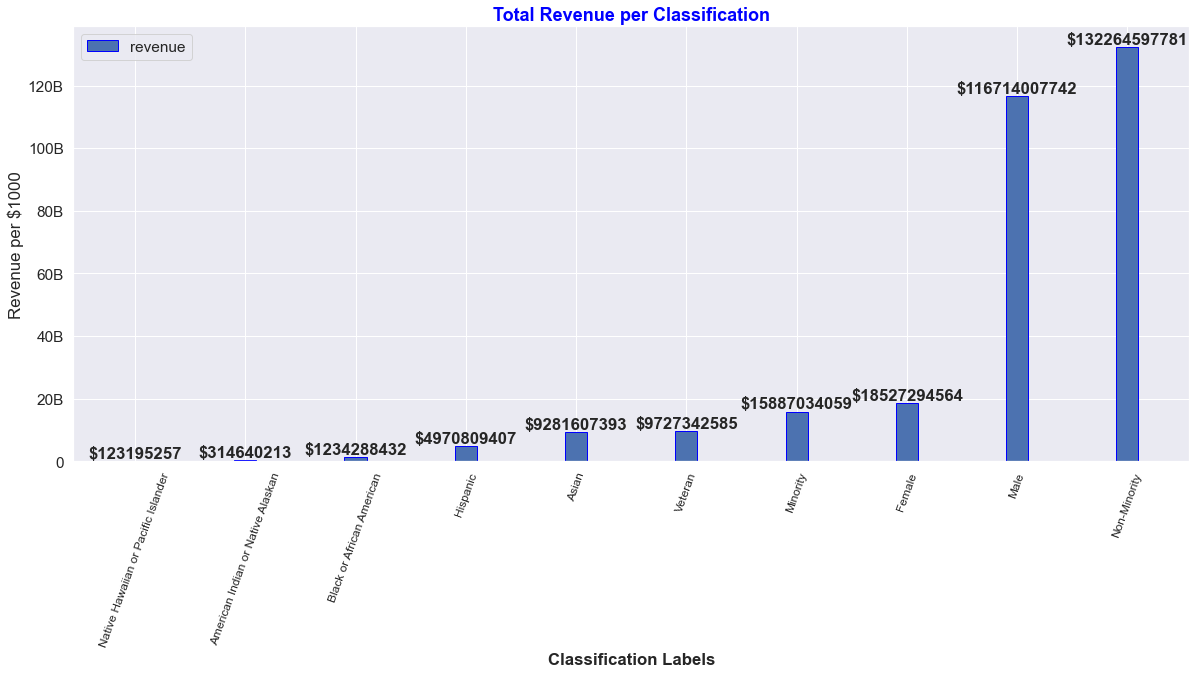

In [897]:
fig = plt.figure(figsize=(20,8))
plt.bar(df_.CL_LABEL, df_.REVENUE, width=.20,  
        edgecolor = "blue", label= ("revenue"))

plt.title("Total Revenue per Classification", fontweight='bold', color = 'blue', fontsize='18')
plt.ylabel("Revenue per $1000")
plt.xlabel("Classification Labels", fontweight="bold")
plt.xticks(df_.CL_LABEL, rotation= 70, fontsize="12")

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

for i, data in enumerate(df_.REVENUE):
    plt.text(x = i, y = data, s = "$" + str(data), fontweight="bold", ha= "center", va= "bottom")
plt.legend(loc= "upper left")
plt.show()

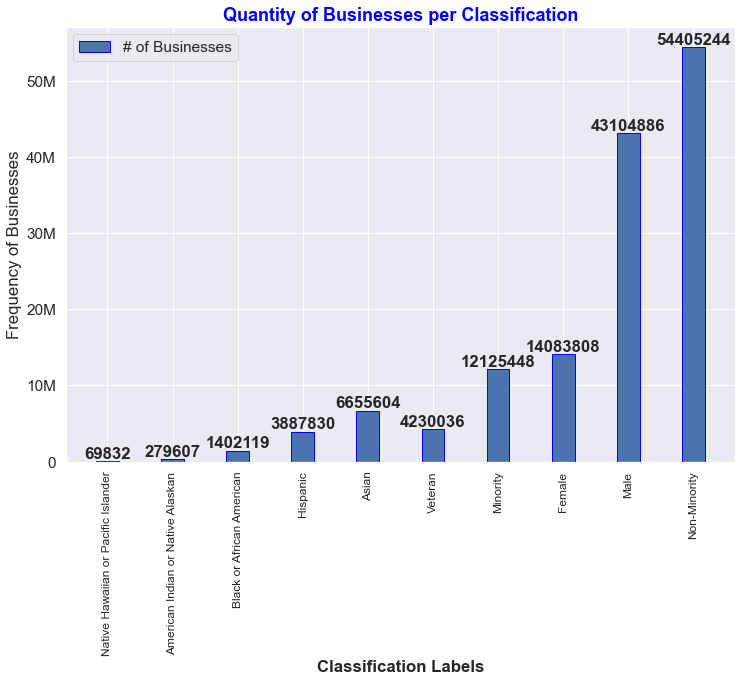

In [898]:
fig = plt.figure(figsize=(12,8))
plt.bar(df_.CL_LABEL, df_.QTY_BUSINESSES, width=.35,  
        edgecolor = "blue", label= ("# of Businesses"))

plt.title("Quantity of Businesses per Classification", fontweight='bold', color = 'blue', fontsize='18')
plt.ylabel("Frequency of Businesses")
plt.xlabel("Classification Labels", fontweight="bold")
plt.xticks(df_.CL_LABEL, rotation=90, fontsize="12")

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));

for i, data in enumerate(df_.QTY_BUSINESSES):
    plt.text(x = i, y = data, s = str(data), fontweight="bold", ha= "center", va= "bottom")

plt.legend()

plt.show()

# Revenue and Quantity of Business for All Ethnicities 

In [899]:
df_race = df_.copy()
df_race = df_race.drop([5,6,7,8,9], axis=0)
df_race = df_race.sort_values(by= "REVENUE")


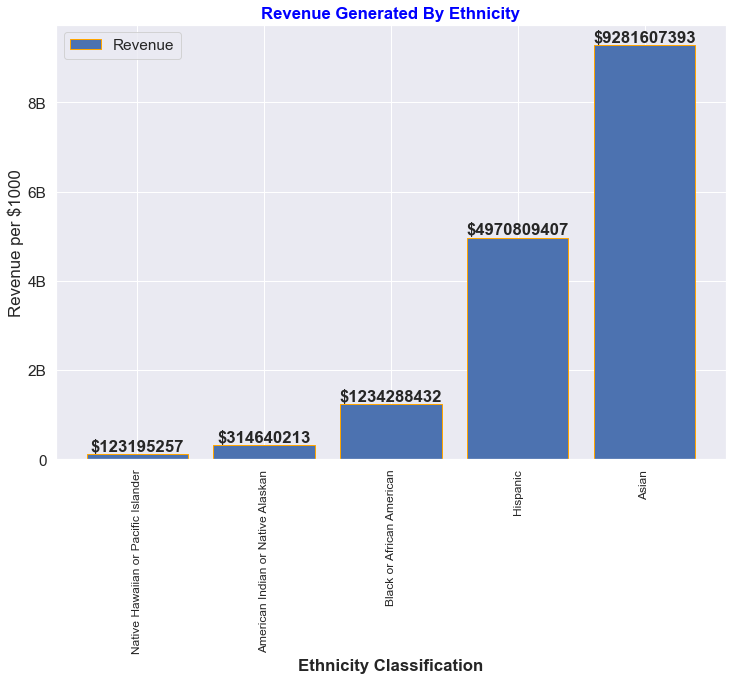

In [900]:
fig = plt.figure(figsize=(12,8))
plt.bar(df_race.CL_LABEL, df_race.REVENUE, edgecolor = "orange", label= ("Revenue"))
plt.title("Revenue Generated By Ethnicity", fontweight="bold", color = "blue")
plt.xlabel("Ethnicity Classification", fontweight = "bold")
plt.ylabel("Revenue per $1000")
plt.xticks(df_race.CL_LABEL, rotation=90, fontsize="12")

for i, data in enumerate(df_race.REVENUE):
    plt.text(x = i, y = data, s = "$" + str(data), fontweight="bold", ha= "center", va="bottom")

plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()

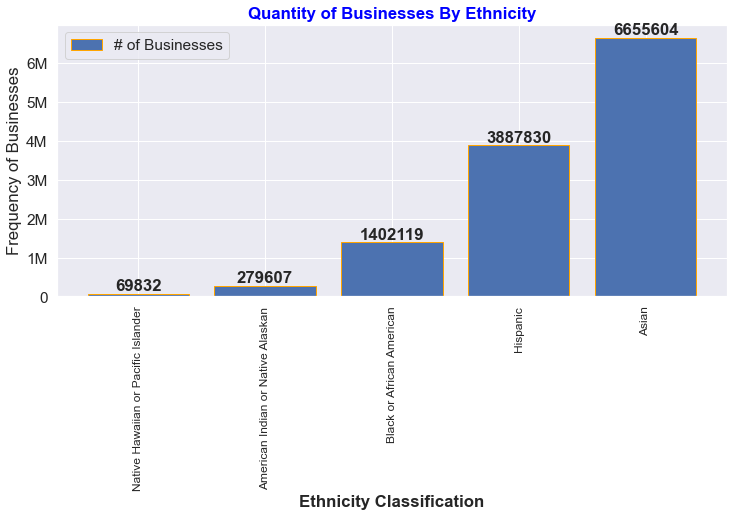

In [901]:
fig = plt.figure(figsize=(12,5))
plt.bar(df_race.CL_LABEL, df_race.QTY_BUSINESSES, edgecolor = "orange", label= ("# of Businesses"))
plt.title("Quantity of Businesses By Ethnicity", fontweight="bold", color = "blue")
plt.xlabel("Ethnicity Classification", fontweight = "bold")
plt.ylabel("Frequency of Businesses")
plt.xticks(df_race.CL_LABEL, rotation=90, fontsize="12")

for i, data in enumerate(df_race.QTY_BUSINESSES):
    plt.text(x = i, y = data, s =str(data), fontweight="bold", ha= "center", va="bottom")

plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()

# Revenue and Quanity for Male v Female

In [902]:
df_sex = df_.copy()
df_sex = df_sex.drop([0,1,2,3,4,5,8,9], axis=0).sort_values(by= "REVENUE")
df_sex

,CL_LABEL,REVENUE,QTY_BUSINESSES
6,Female,18527294564,14083808
7,Male,116714007742,43104886


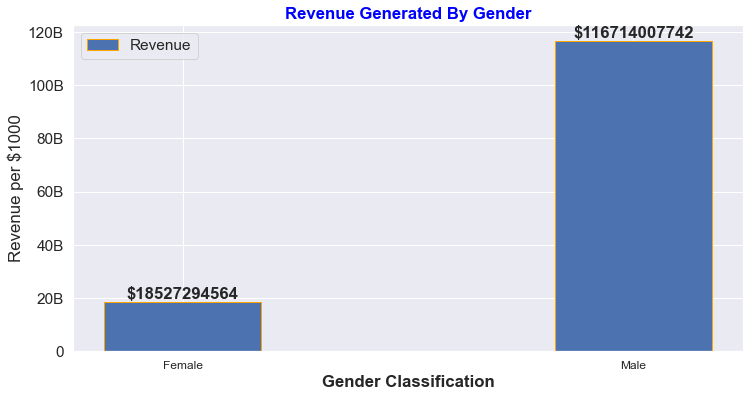

In [903]:
fig = plt.figure(figsize=(12,6))
plt.bar(df_sex.CL_LABEL, df_sex.REVENUE, edgecolor = "orange", label= ("Revenue"), width= .35)
plt.title("Revenue Generated By Gender", fontweight="bold", color = "blue")
plt.xlabel("Gender Classification", fontweight = "bold")
plt.ylabel("Revenue per $1000")
plt.xticks(df_sex.CL_LABEL, fontsize="12")

for i, data in enumerate(df_sex.REVENUE):
    plt.text(x = i, y = data, s = "$" + str(data), fontweight="bold", ha= "center", va="bottom")

plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()

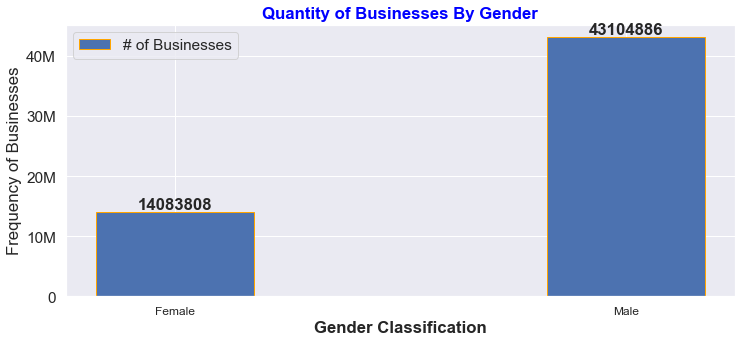

In [909]:
fig = plt.figure(figsize=(12,5))
plt.bar(df_sex.CL_LABEL, df_sex.QTY_BUSINESSES, edgecolor = "orange", label= ("# of Businesses"), width= .35)
plt.title("Quantity of Businesses By Gender", fontweight="bold", color = "blue")
plt.xlabel("Gender Classification", fontweight = "bold")
plt.ylabel("Frequency of Businesses")
plt.xticks(df_sex.CL_LABEL,  fontsize="12")

for i, data in enumerate(df_sex.QTY_BUSINESSES):
    plt.text(x = i, y = data, s = str(data), fontweight="bold", ha= "center", va="bottom")

plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()

# Revenue and Quantity Minority v Non-Minority

In [905]:
df_q = df_.copy()
df_q = df_q.drop([0,1,2,3,4,5,6,7], axis=0).sort_values(by= "REVENUE")

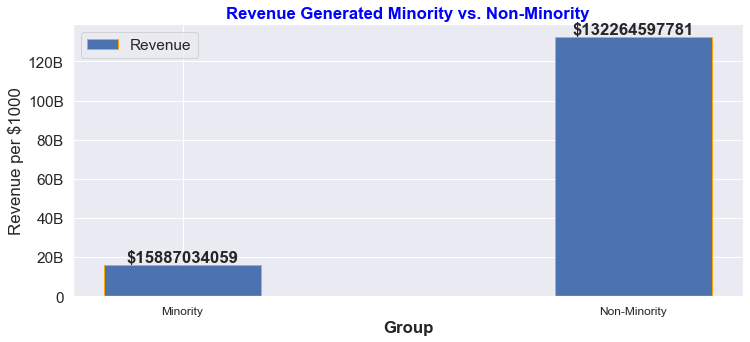

In [906]:
fig = plt.figure(figsize=(12,5))
plt.bar(df_q.CL_LABEL, df_q.REVENUE, edgecolor = "orange", label= ("Revenue"), width= .35)
plt.title("Revenue Generated Minority vs. Non-Minority", fontweight="bold", color = "blue")
plt.xlabel("Group", fontweight = "bold")
plt.ylabel("Revenue per $1000")
plt.xticks(df_q.CL_LABEL, fontsize="12")

for i, data in enumerate(df_q.REVENUE):
    plt.text(x = i, y = data, s = "$" + str(data), fontweight="bold", ha= "center", va="bottom")

plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()

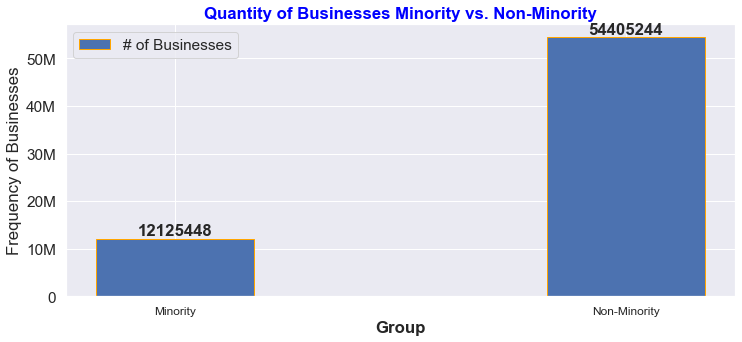

In [910]:
fig = plt.figure(figsize=(12,5))
plt.bar(df_q.CL_LABEL, df_q.QTY_BUSINESSES, edgecolor = "orange", label= ("# of Businesses"), width= .35)
plt.title("Quantity of Businesses Minority vs. Non-Minority", fontweight="bold", color = "blue")
plt.xlabel("Group", fontweight = "bold")
plt.ylabel("Frequency of Businesses")
plt.xticks(df_q.CL_LABEL, fontsize="12")

for i, data in enumerate(df_q.QTY_BUSINESSES):
    plt.text(x = i, y = data, s = str(data), fontweight="bold", ha= "center", va="bottom")

plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()